4.2 Predicting Future Stock Prices
with LSTM in TensorFlow Keras

Data set from the Yahoo finance ...
with the Nike's data! and Meta!  (for just testing)
And we are going to make the data as

Setting---
Because we are using the TensorFlow
We need to install the tensorflow from the pip package to use it.

In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.3 kB/s 
     |████████████████████████████████| 6.0 MB 62.0 MB/s 
     |████████████████████████████████| 1.7 MB 61.8 MB/s 
     |████████████████████████████████| 439 kB 68.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

Importing the DataSet

For this example
The dataset can be downloaded from this site: https://finance.yahoo.com/quote/FB/history?p=FB.


Use the Facebook stock history


In my personal I tried with the Nike's stock history

In [ ]:
## for importing libraries
import pandas as pd
import numpy as np

## import the dataset
fb_complete_data = pd.read_csv("/content/META_train.csv")

Print header to check the dataset

In [ ]:
# printing dataset header
fb_complete_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [ ]:
nk_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,48.275002,48.474998,47.055000,47.514999,43.770935,4985800
1,2015-01-05,47.255001,47.275002,46.564999,46.750000,43.066204,6889200
2,2015-01-06,46.945000,47.075001,46.035000,46.474998,42.812881,7576000
3,2015-01-07,46.805000,47.650002,46.549999,47.435001,43.697227,7256000
4,2015-01-08,47.830002,48.549999,47.810001,48.529999,44.705956,5978200


The output shows that our dataset consists of seven columns. However, in this section, we are only interested in the Open column. Therefore, we will select the Open column from the dataset.

In [ ]:
#filtering open column
fb_training_processed = fb_complete_data[['Open']].values

In [ ]:
#Scaling feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
fb_training_scaled = scaler.fit_transform(fb_training_processed)

In [ ]:
len(fb_training_scaled)

1257

In [ ]:
len(nk_training_scaled)

1993

Our feature set will consist of 60 timesteps of 1 feature. The feature set basically consists of the opening stock price of the past 60 days

In [ ]:
#training features contained data of last 60 days
#training labels contain data of 61st day
fb_training_features= []
fb_training_labels = []
for i in range(60, len(fb_training_scaled)):
  fb_training_features.append(fb_training_scaled[i-60:i,0])
  fb_training_labels.append(fb_training_scaled[i, 0])

In [ ]:
#converting training data to numpy arrays
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


We need to reshape our oinput feature into a three dimensional format

In [ ]:
#Converting data into 3D shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

The following script creates our LSTM model. We have four LSTM layers with 100 nodes each. Each LSTM layer is followed by a dropout layer to avoid overfitting. The final dense layer has one node since the output is a single value.

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model

In [ ]:
#defining the LSTM network

input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

Next, we need to convert the output y into a column vector.

In [ ]:
print(X_train.shape)
print(y_train.shape)

y_train= y_train.reshape(-1,1)
print(y_train.shape)

(1197, 60, 1)
(1197,)
(1197, 1)


The following script trains our stock price prediction model on the training set

In [ ]:
#training the model
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 216ms/step - loss: 0.0887
Epoch 2/100
38/38 [==============================] - 10s 255ms/step - loss: 0.0089
Epoch 3/100
38/38 [==============================] - 8s 205ms/step - loss: 0.0069
Epoch 4/100
38/38 [==============================] - 8s 204ms/step - loss: 0.0069
Epoch 5/100
38/38 [==============================] - 8s 211ms/step - loss: 0.0063
Epoch 6/100
38/38 [==============================] - 9s 225ms/step - loss: 0.0062
Epoch 7/100
38/38 [==============================] - 10s 264ms/step - loss: 0.0061
Epoch 8/100
38/38 [==============================] - 8s 219ms/step - loss: 0.0062
Epoch 9/100
38/38 [==============================] - 8s 207ms/step - loss: 0.0054
Epoch 10/100
38/38 [==============================] - 8s 207ms/step - loss: 0.0058
Epoch 11/100
38/38 [==============================] - 8s 210ms/step - loss: 0.0059
Epoch 12/100
38/38 [==============================] - 8s 206ms/step - loss: 0.0055
Epoch 13/1

Testing the Stock Prediction Model


*   The test data should also be converted into the right shape to test our stock prediction model. We will do that later.
*   Let’s first import the data and then remove all the columns from the test data except the Open column.



Import the data

In [ ]:
#creating test set
fb_testing_complete_data = pd.read_csv("/content/META_test.csv")
fb_testing_processed = fb_testing_complete_data[['Open']]. values

Let’s concatenate the training and test sets. We do this because to predict the first value in the test set, the input will be the data from the past 60 days, which is basically the data from the last 60 days in the training set.

In [ ]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [ ]:
test_inputs = fb_all_data [len(fb_all_data) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

(80,)


In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [ ]:
fb_test_features = []
for i in range(60, 80):
  fb_test_features.append(test_inputs[i-60:i, 0])

In [ ]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


Our feature set is currently 2-dimensional. But the LSTM algorithm in Keras accepts data in 3-dimensional. The following script converts our input features into a 3-dimensional shape.

In [ ]:
#converting test data into 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test. shape[1], 1))
print(X_test.shape)

(20, 60, 1)


Now is the time to make predictions on the test set.

In [ ]:
#making predictions on test set
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 65ms/step


Since we scaled our input feature, we need to apply the inverse_transform() method of the scaler object on the predicted output to get the original output values.

In [ ]:
#converting scaled data back to original data
y_pred = scaler.inverse_transform(y_pred)

Finally, to compare the predicted output with the actual stock price values, you can plot the two values

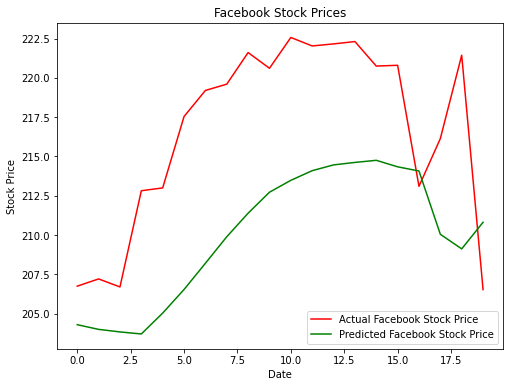

In [ ]:
#plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facebook Stock Price')
plt.plot(y_pred , color='green', label='Predicted Facebook Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The output shows that our algorithm has been able to partially capture the trend of the future opening stock prices for Facebook data

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)